## 1.b

In [20]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt


notas_iniciais = [3.7, 8.0, 7.2, 2.5, 3.2, 3.8, 9.8, 8.1, 6.6, 8.8, 7.6, 1.8, 1.1, 2.0, 4.4]
notas_finais = [3.2, 8.4, 6.5, 4.3, 2.8, 5.2, 9.3, 7.6, 6.8, 9.4, 6.9, 2.5, 0.8, 1.5, 5.8]

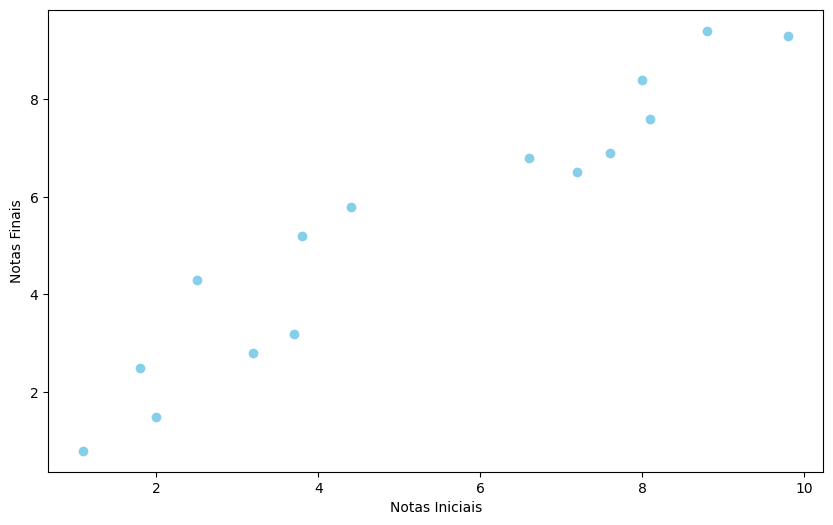

In [17]:
plt.figure(figsize=(10,6))
plt.scatter(notas_iniciais, notas_finais, color='skyblue')
plt.xlabel('Notas Iniciais')
plt.ylabel('Notas Finais')
plt.show()

In [16]:
b, a, _, _, _ = stats.linregress(notas_iniciais, notas_finais)
print(f'A equação da reta é: y = {b:.2f}x + {a:.2f}')

A equação da reta é: y = 0.92x + 0.58


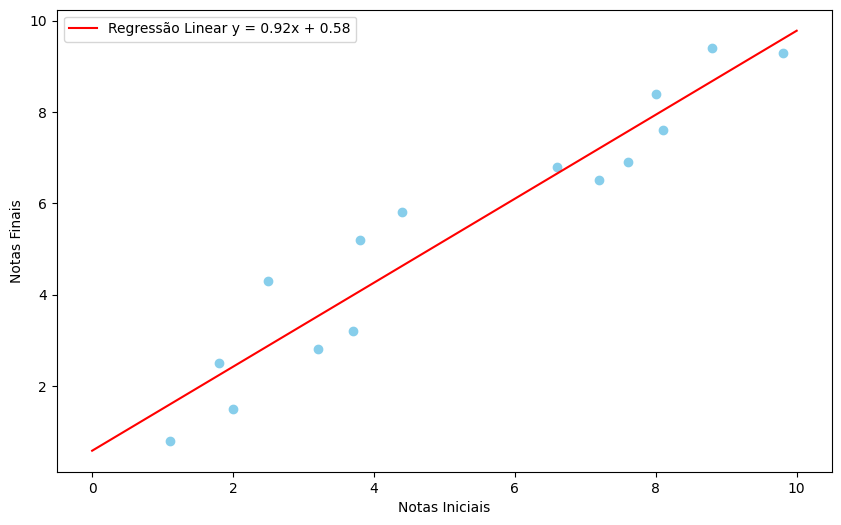

In [37]:
x = np.array([0,10])
y = a + b*x

plt.figure(figsize=(10,6))
plt.scatter(notas_iniciais, notas_finais, color='skyblue')
plt.plot(x, y,'-r', label=f'Regressão Linear y = {b:.2}x + {a:.2}')
plt.xlabel('Notas Iniciais')
plt.ylabel('Notas Finais')
plt.legend()
plt.show()

## 1.c

In [65]:
def media(x):
  media = 0
  for i in range(len(x)):
    media += x[i]
  media = media/len(x)
  return media

def regressao(x, y):
  x_mean = media(x)
  y_mean = media(y)

  numerador = 0
  denominador = 0
  for i in range(len(x)):
    numerador += (x[i] - x_mean)*(y[i] - y_mean)
    denominador += (x[i] - x_mean)**2

  b = numerador/denominador
  a = y_mean - b*x_mean

  return a, b

a,b = regressao(notas_iniciais, notas_finais)
print(f'A equação da reta é: y = {b:.2f}x + {a:.2f}')

A equação da reta é: y = 0.92x + 0.58


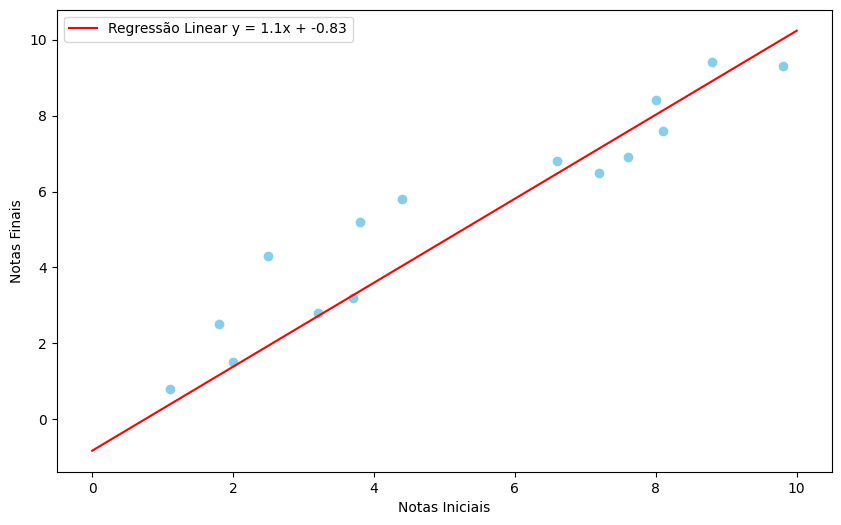

In [67]:
x1 = 0
x2 = 10
y1 = a + b*x1
y2 = a + b*x2

plt.figure(figsize=(10,6))
plt.scatter(notas_iniciais, notas_finais, color='skyblue')
plt.plot([x1,x2], [y1,y2],'-r', label=f'Regressão Linear y = {b:.2}x + {a:.2}')
plt.xlabel('Notas Iniciais')
plt.ylabel('Notas Finais')
plt.legend()
plt.show()

## 2.a

In [47]:
import pandas as pd
import zipfile
import requests
from io import BytesIO

In [51]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip"
r = requests.get(url)
z = zipfile.ZipFile(BytesIO(r.content))

df = pd.read_csv(z.open('student-mat.csv'), sep=';')
dados_notas_iniciais = df['G1'].tolist() #tabem temos G2 e G3 que sao respectivamento nota parcial 2 e media final
dados_notas_iniciais = [x/2 for x in dados_notas_iniciais] #para deixar os dados de 0 a 10
dados_notas_finais = df['G3'].tolist()
dados_notas_finais = [x/2 for x in dados_notas_finais]
len(dados_notas_iniciais)
len(dados_notas_finais)

395

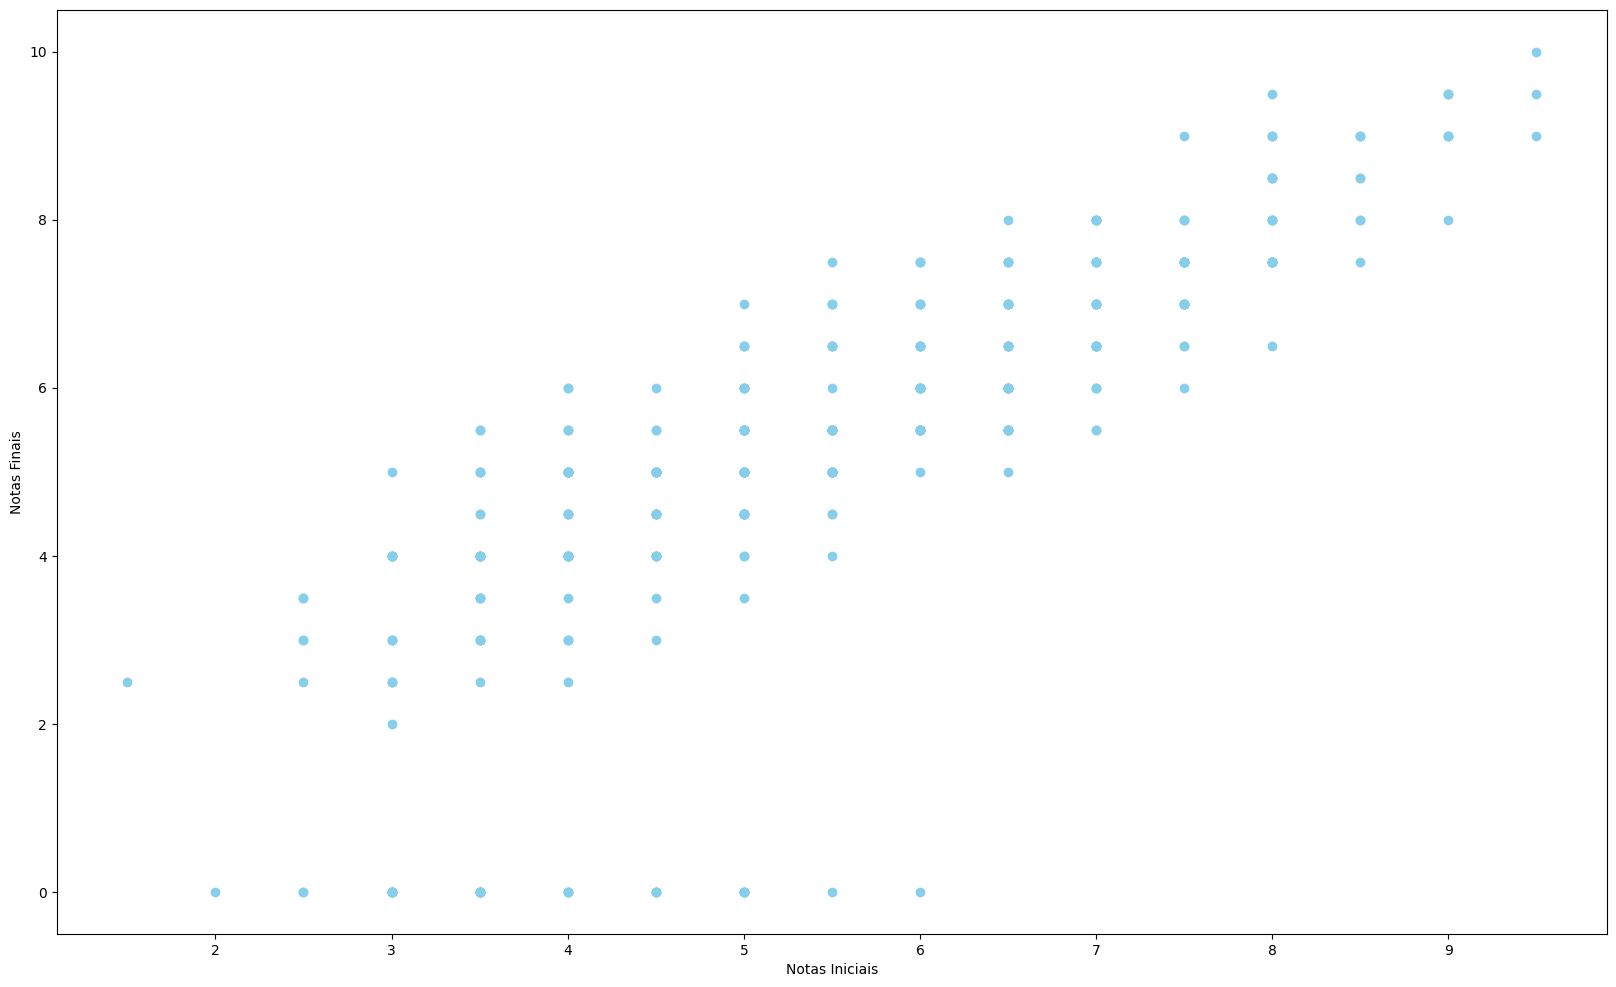

In [62]:
plt.figure(figsize=(20,12))
plt.scatter(dados_notas_iniciais, dados_notas_finais, color='skyblue')
plt.xlabel('Notas Iniciais')
plt.ylabel('Notas Finais')
plt.show()
# a tabela fica esquisita mas creio que seja pela natureza dos dados, ja que notas da prova 1 e nota final tendem a ser meio constantes

In [61]:
b, a, _, _, _ = stats.linregress(dados_notas_iniciais, dados_notas_finais)
print(f'A equação da reta é: y = {b:.2f}x + {a:.2f}')
#mostra que tem poucos dados proximos de 0 e que a regressao linear nao seja a melhor para modelar esse caso, dado que valores < 0, deveriam ser impossiveis

A equação da reta é: y = 1.11x + -0.83


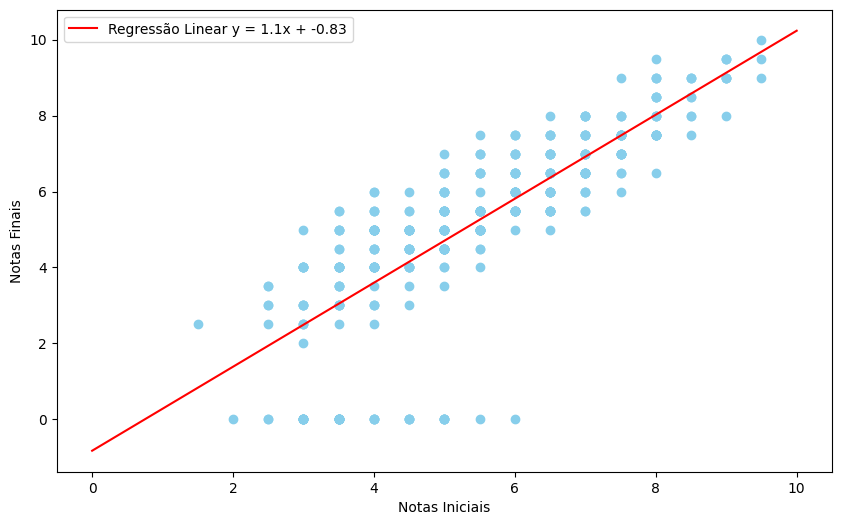

In [64]:
x = np.array([0,10])
y = a + b*x

plt.figure(figsize=(10,6))
plt.scatter(dados_notas_iniciais, dados_notas_finais, color='skyblue')
plt.plot(x, y,'-r', label=f'Regressão Linear y = {b:.2}x + {a:.2}')
plt.xlabel('Notas Iniciais')
plt.ylabel('Notas Finais')
plt.legend()
plt.show()

## 2.b

In [66]:
def media(x):
  media = 0
  for i in range(len(x)):
    media += x[i]
  media = media/len(x)
  return media

def regressao(x, y):
  x_mean = media(x)
  y_mean = media(y)

  numerador = 0
  denominador = 0
  for i in range(len(x)):
    numerador += (x[i] - x_mean)*(y[i] - y_mean)
    denominador += (x[i] - x_mean)**2

  b = numerador/denominador
  a = y_mean - b*x_mean

  return a, b

a,b = regressao(dados_notas_iniciais, dados_notas_finais)
print(f'A equação da reta é: y = {b:.2f}x + {a:.2f}')

A equação da reta é: y = 1.11x + -0.83


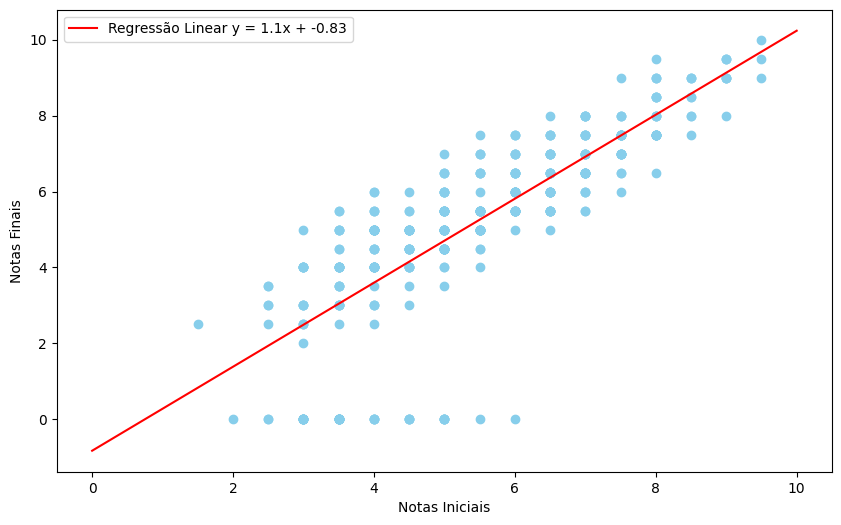

In [69]:
x1 = 0
x2 = 10
y1 = a + b*x1
y2 = a + b*x2

plt.figure(figsize=(10,6))
plt.scatter(dados_notas_iniciais, dados_notas_finais, color='skyblue')
plt.plot([x1,x2], [y1,y2],'-r', label=f'Regressão Linear y = {b:.2}x + {a:.2}')
plt.xlabel('Notas Iniciais')
plt.ylabel('Notas Finais')
plt.legend()
plt.show()